In [95]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
path = 'C:/Users/gusta/OneDrive/Área de Trabalho/Indicium/banvic_data'
files = [file for file in os.listdir(path)]
dfs = []
for file in files:
    dfs.append(pd.read_csv(path+'/'+file))

In [97]:
agencias = dfs[0]
clientes = dfs[1]
colaboradores = dfs[2]
colaborador_agencia = dfs[3]
contas = dfs[4]
propostas = dfs[5]
transacoes = dfs[6]

## Tabela agencias

In [98]:
agencias

,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física
5,5,Agência Porto Alegre,"Av. Bento Gonçalves, 1924 - Partenon, Porto Al...",Porto Alegre,RS,2013-12-01,Física
6,6,Agência Rio de Janeiro,"R. Sen. Dantas, 15 - Centro, Rio de Janeiro - ...",Rio de Janeiro,RJ,2015-04-01,Física
7,8,Agência Jardins,"Av. Brg. Faria Lima, 2491 - Jardim Paulistano,...",São Paulo,SP,2018-01-09,Física
8,9,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
9,10,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,2021-10-09,Física


Transformando o tipo da coluna data_abertura para data

In [99]:
agencias['data_abertura'] = agencias['data_abertura'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))

## Tabela clientes

In [100]:
clientes

,cod_cliente,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
0,28,Sabrina,Dias,moreiraemanuelly@example.org,PF,2017-04-03 16:11:00 UTC,357.081.496-39,2006-08-11,Praia de Duarte Vila Piratininga 81327-166 Fer...,95140-704
1,674,Luiz Felipe,Dias,pedroferreira@example.org,PF,2021-02-10 13:27:00 UTC,085.196.374-93,1995-10-11,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",76516-765
2,693,Renan,Dias,ogomes@example.net,PF,2020-01-21 13:12:00 UTC,783.416.059-10,1948-11-19,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,51779625
3,743,Clara,Dias,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792
4,769,André,Dias,danilo33@example.org,PF,2017-01-07 14:53:00 UTC,459.608.721-02,1990-08-25,"Rua Correia, 889 Diamante 59123250 Aragão / RS",01672838
...,...,...,...,...,...,...,...,...,...,...
993,730,Bárbara,da Conceição,enzo-gabrielcardoso@example.com,PF,2019-05-02 11:22:00 UTC,019.385.267-59,1966-03-06,"Chácara de Martins, 85 Mantiqueira 26805-573 A...",08264521
994,772,Daniel,da Conceição,raquel97@example.com,PF,2017-06-08 11:13:00 UTC,240.581.396-33,1971-07-20,"Pátio de Souza, 8 Vila Puc 47056676 Duarte / MS",55045-265
995,837,Theo,da Conceição,ninacastro@example.org,PF,2014-03-18 10:30:00 UTC,058.734.129-79,1944-06-03,"Loteamento Pires, 4 Jardim Felicidade 69804-76...",88159-361
996,845,Pedro Lucas,da Conceição,silveirabruno@example.com,PF,2020-12-16 15:14:00 UTC,347.028.591-88,1943-12-12,"Travessa Eloah Moura, 97 Alta Tensão 2ª Seção ...",36211-005


Juntando os nomes

In [101]:
clientes['nome'] = clientes.primeiro_nome +' '+ clientes.ultimo_nome
clientes.drop(['primeiro_nome', 'ultimo_nome'], axis=1, inplace=True)

In [102]:
clientes

,cod_cliente,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep,nome
0,28,moreiraemanuelly@example.org,PF,2017-04-03 16:11:00 UTC,357.081.496-39,2006-08-11,Praia de Duarte Vila Piratininga 81327-166 Fer...,95140-704,Sabrina Dias
1,674,pedroferreira@example.org,PF,2021-02-10 13:27:00 UTC,085.196.374-93,1995-10-11,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",76516-765,Luiz Felipe Dias
2,693,ogomes@example.net,PF,2020-01-21 13:12:00 UTC,783.416.059-10,1948-11-19,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,51779625,Renan Dias
3,743,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792,Clara Dias
4,769,danilo33@example.org,PF,2017-01-07 14:53:00 UTC,459.608.721-02,1990-08-25,"Rua Correia, 889 Diamante 59123250 Aragão / RS",01672838,André Dias
...,...,...,...,...,...,...,...,...,...
993,730,enzo-gabrielcardoso@example.com,PF,2019-05-02 11:22:00 UTC,019.385.267-59,1966-03-06,"Chácara de Martins, 85 Mantiqueira 26805-573 A...",08264521,Bárbara da Conceição
994,772,raquel97@example.com,PF,2017-06-08 11:13:00 UTC,240.581.396-33,1971-07-20,"Pátio de Souza, 8 Vila Puc 47056676 Duarte / MS",55045-265,Daniel da Conceição
995,837,ninacastro@example.org,PF,2014-03-18 10:30:00 UTC,058.734.129-79,1944-06-03,"Loteamento Pires, 4 Jardim Felicidade 69804-76...",88159-361,Theo da Conceição
996,845,silveirabruno@example.com,PF,2020-12-16 15:14:00 UTC,347.028.591-88,1943-12-12,"Travessa Eloah Moura, 97 Alta Tensão 2ª Seção ...",36211-005,Pedro Lucas da Conceição


Conferindo os tipos de clientes

In [103]:
clientes['tipo_cliente'].unique()

array(['PF'], dtype=object)

Estratificando idades dos clientes

In [104]:
clientes['data_nascimento'] = clientes['data_nascimento'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))
clientes['idade'] = clientes['data_nascimento'].apply(lambda date: datetime.today().year - date.year - ((datetime.today().month, datetime.today().day) < (date.month, date.day)))

In [105]:
clientes['idade'].describe()

count    998.000000
mean      49.443888
std       18.756754
min       17.000000
25%       33.000000
50%       50.000000
75%       66.000000
max       81.000000
Name: idade, dtype: float64

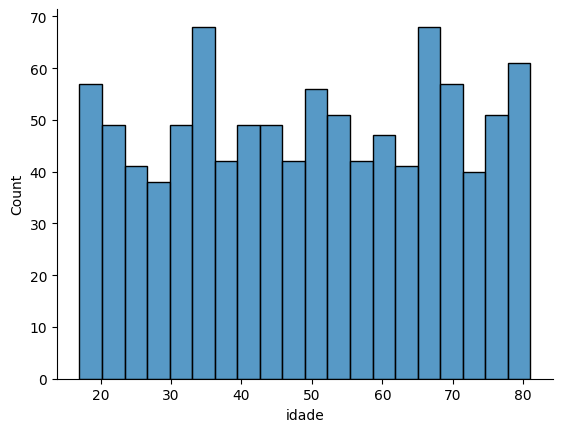

In [106]:
sns.histplot(data=clientes, x='idade', bins=20)
sns.despine()

Criando coluna de tempo desde inclusão

In [107]:
clientes[['data_inclusao', 'hora_inclusao']] = clientes['data_inclusao'].str.split(' ', n=1, expand=True)

In [108]:
clientes['data_inclusao'] = clientes['data_inclusao'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))

In [109]:
clientes['tempo_de_inclusao'] = clientes['data_inclusao'].apply(lambda date: datetime.today().year - date.year - ((datetime.today().month, datetime.today().day) < (date.month, date.day)))

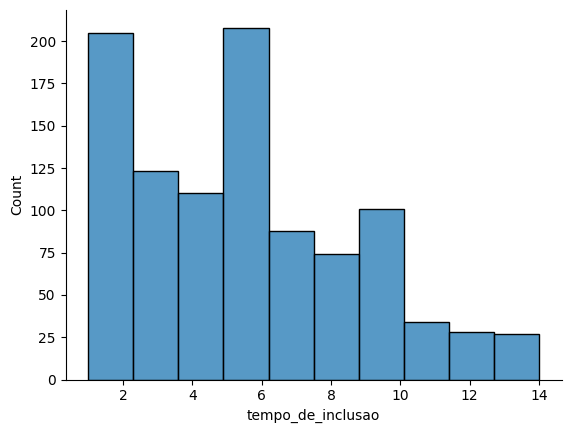

In [110]:
sns.histplot(data=clientes, x='tempo_de_inclusao', bins=10)
sns.despine()

## Tabela colaborador_agencia

In [111]:
colaborador_agencia

,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1
...,...,...
95,82,10
96,89,10
97,95,10
98,99,10


##  Tabela colaborades

In [112]:
colaboradores

,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep
0,14,Paulo,Dias,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674
1,19,Luiz Fernando,Dias,pcunha@example.net,820.415.963-33,1994-07-10,"Ladeira de Moreira, 82 Jardim Atlântico 27617-...",50013962
2,32,Vitor Hugo,Dias,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215
3,88,João Gabriel,Lima,luiz-otaviorezende@example.org,967.082.451-67,1994-10-19,"Trevo Murilo Ramos, 92 São Benedito 73615-597 ...",24224-305
4,39,Maria Eduarda,Melo,joao-pedro72@example.com,857.496.210-49,1996-03-01,"Parque de Moura, 65 Granja Werneck 67769059 da...",96896390
...,...,...,...,...,...,...,...,...
95,94,Melissa,Gonçalves,caldeirasamuel@example.com,825.670.139-03,1971-01-09,"Largo de Pinto, 96 Vila Independencia 2ª Seção...",66939-843
96,28,Alexandre,Nascimento,olivia97@example.org,719.360.824-03,1992-01-12,"Aeroporto Maria Cecília Rocha, 39 Serra Do Cur...",42178150
97,80,Clarice,Nascimento,lorena74@example.org,956.104.283-51,1995-12-01,"Rua de da Mota, 7 Vila Mantiqueira 17429735 Je...",40016475
98,27,Marcela,da Conceição,mcosta@example.com,139.467.025-70,1963-05-14,"Avenida de Campos, 513 Tres Marias 67624232 Co...",66423556


Juntando os nomes

In [113]:
colaboradores['nome'] = colaboradores.primeiro_nome +' '+ colaboradores.ultimo_nome
colaboradores.drop(['primeiro_nome', 'ultimo_nome'], axis=1, inplace=True)

In [114]:
colaboradores['data_nascimento'] = colaboradores['data_nascimento'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))
colaboradores['idade'] = colaboradores['data_nascimento'].apply(lambda date: datetime.today().year - date.year - ((datetime.today().month, datetime.today().day) < (date.month, date.day)))

In [115]:
colaboradores['idade'].describe()

count    100.000000
mean      43.600000
std       10.823655
min       26.000000
25%       33.000000
50%       45.000000
75%       53.250000
max       61.000000
Name: idade, dtype: float64

In [116]:
colaboradores

,cod_colaborador,email,cpf,data_nascimento,endereco,cep,nome,idade
0,14,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674,Paulo Dias,50
1,19,pcunha@example.net,820.415.963-33,1994-07-10,"Ladeira de Moreira, 82 Jardim Atlântico 27617-...",50013962,Luiz Fernando Dias,30
2,32,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215,Vitor Hugo Dias,37
3,88,luiz-otaviorezende@example.org,967.082.451-67,1994-10-19,"Trevo Murilo Ramos, 92 São Benedito 73615-597 ...",24224-305,João Gabriel Lima,29
4,39,joao-pedro72@example.com,857.496.210-49,1996-03-01,"Parque de Moura, 65 Granja Werneck 67769059 da...",96896390,Maria Eduarda Melo,28
...,...,...,...,...,...,...,...,...
95,94,caldeirasamuel@example.com,825.670.139-03,1971-01-09,"Largo de Pinto, 96 Vila Independencia 2ª Seção...",66939-843,Melissa Gonçalves,53
96,28,olivia97@example.org,719.360.824-03,1992-01-12,"Aeroporto Maria Cecília Rocha, 39 Serra Do Cur...",42178150,Alexandre Nascimento,32
97,80,lorena74@example.org,956.104.283-51,1995-12-01,"Rua de da Mota, 7 Vila Mantiqueira 17429735 Je...",40016475,Clarice Nascimento,28
98,27,mcosta@example.com,139.467.025-70,1963-05-14,"Avenida de Campos, 513 Tres Marias 67624232 Co...",66423556,Marcela da Conceição,61


## Tabela contas

In [117]:
contas

,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
0,53,53,1,7,PF,2011-05-24 15:30:00 UTC,2984.7615,2814.67,2019-07-02 11:03:46 UTC
1,190,190,1,7,PF,2014-10-17 14:48:00 UTC,4262.4322,4191.86,2021-03-25 12:00:15 UTC
2,191,191,1,7,PF,2013-03-23 14:14:00 UTC,3266.5680,3080.71,2016-09-09 23:34:15 UTC
3,203,203,1,7,PF,2016-08-03 16:13:00 UTC,21241.5424,19461.56,2022-12-28 07:58:24 UTC
4,254,254,1,7,PF,2012-10-24 13:48:00 UTC,13335.6966,13197.54,2013-12-20 22:20:00 UTC
...,...,...,...,...,...,...,...,...,...
994,466,466,10,8,PF,2022-10-26 14:13:00 UTC,7847.4165,9351.63,2022-12-30 00:00:00.319185 UTC
995,764,764,10,8,PF,2022-09-08 11:06:00 UTC,65495.1872,64823.14,2022-12-29 23:59:59.964121 UTC
996,488,488,10,18,PF,2022-07-16 10:16:00 UTC,8663.6081,6836.57,2022-12-30 00:00:00.966349 UTC
997,395,395,10,95,PF,2022-12-01 15:27:00 UTC,23156.2065,21578.33,2022-12-30 00:00:00.607818 UTC


Conferindo os tipos de conta

In [118]:
contas['tipo_conta'].unique()

array(['PF'], dtype=object)

Calcular quantos anos uma conta está aberta

In [119]:
contas[['data_abertura', 'hora_abertura']] = contas['data_abertura'].str.split(' ', n=1, expand=True)

In [120]:
contas['data_abertura'] = contas['data_abertura'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))

In [121]:
contas['idade'] = contas['data_abertura'].apply(lambda date: datetime.today().year - date.year - ((datetime.today().month, datetime.today().day) < (date.month, date.day)))

Calcular dias da última transação

In [122]:
contas[['data_ultimo_lancamento', 'hora_ultimo_lancamento']] = contas['data_ultimo_lancamento'].str.split(' ', n=1, expand=True)
contas['data_ultimo_lancamento'] = contas['data_ultimo_lancamento'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))

In [123]:
contas['dias_desde_ultimo_lancamento'] = contas['data_ultimo_lancamento'].apply(lambda date: (datetime.today() - date).days)

Arredondando para 2 casas decimais

In [124]:
contas['saldo_total'] = contas['saldo_total'].apply(lambda valor: round(valor,2))
contas['saldo_disponivel'] = contas['saldo_disponivel'].apply(lambda valor: round(valor,2))

In [125]:
contas

,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento,hora_abertura,idade,hora_ultimo_lancamento,dias_desde_ultimo_lancamento
0,53,53,1,7,PF,2011-05-24,2984.76,2814.67,2019-07-02,15:30:00 UTC,13,11:03:46 UTC,1835
1,190,190,1,7,PF,2014-10-17,4262.43,4191.86,2021-03-25,14:48:00 UTC,9,12:00:15 UTC,1203
2,191,191,1,7,PF,2013-03-23,3266.57,3080.71,2016-09-09,14:14:00 UTC,11,23:34:15 UTC,2861
3,203,203,1,7,PF,2016-08-03,21241.54,19461.56,2022-12-28,16:13:00 UTC,7,07:58:24 UTC,560
4,254,254,1,7,PF,2012-10-24,13335.70,13197.54,2013-12-20,13:48:00 UTC,11,22:20:00 UTC,3855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,466,466,10,8,PF,2022-10-26,7847.42,9351.63,2022-12-30,14:13:00 UTC,1,00:00:00.319185 UTC,558
995,764,764,10,8,PF,2022-09-08,65495.19,64823.14,2022-12-29,11:06:00 UTC,1,23:59:59.964121 UTC,559
996,488,488,10,18,PF,2022-07-16,8663.61,6836.57,2022-12-30,10:16:00 UTC,1,00:00:00.966349 UTC,558
997,395,395,10,95,PF,2022-12-01,23156.21,21578.33,2022-12-30,15:27:00 UTC,1,00:00:00.607818 UTC,558


## Tabela propostas

In [126]:
propostas

,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta
0,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,0,Enviada
1,715,45,1,2021-06-17 13:09:32 UTC,0.0131,12897.538285,19848.55,6951.011715,232.124685,100,1,Enviada
2,755,494,1,2021-08-10 04:24:02 UTC,0.0203,122236.312551,187154.36,64918.047449,3673.518951,56,0,Enviada
3,953,381,1,2011-02-23 07:57:58 UTC,0.0167,47784.649757,59530.61,11745.960243,955.041560,109,3,Enviada
4,1046,176,1,2010-11-15 16:03:28 UTC,0.0211,178393.038243,214294.19,35901.151757,10219.659415,22,4,Enviada
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1758,176,99,2010-01-10 08:12:47 UTC,0.0133,96404.111608,184043.36,87639.248392,1673.386037,110,6,Validação documentos
1996,582,241,100,2019-02-25 05:03:22 UTC,0.0151,61292.834593,82684.29,21391.455407,2219.574245,36,2,Validação documentos
1997,970,106,100,2011-06-05 04:13:16 UTC,0.0225,100371.681790,152272.50,51900.818210,3482.000980,47,2,Validação documentos
1998,1361,814,100,2020-07-25 20:50:30 UTC,0.0227,45431.892941,74490.36,29058.467059,1326.031489,67,5,Validação documentos


In [127]:
propostas[['data_entrada_proposta', 'hora_entrada_proposta']] = propostas['data_entrada_proposta'].str.split(' ', n=1, expand=True)


In [130]:
propostas['valor_proposta'] = propostas['valor_proposta'].apply(lambda valor: round(valor, 2))
propostas['valor_financiamento'] = propostas['valor_financiamento'].apply(lambda valor: round(valor, 2))
propostas['valor_entrada'] = propostas['valor_entrada'].apply(lambda valor: round(valor, 2))
propostas['valor_prestacao'] = propostas['valor_prestacao'].apply(lambda valor: round(valor, 2))

In [131]:
propostas

,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta,hora_entrada_proposta
0,116,338,1,2014-05-30,0.0194,36199.95,50032.03,13832.08,1045.22,58,0,Enviada,18:43:12 UTC
1,715,45,1,2021-06-17,0.0131,12897.54,19848.55,6951.01,232.12,100,1,Enviada,13:09:32 UTC
2,755,494,1,2021-08-10,0.0203,122236.31,187154.36,64918.05,3673.52,56,0,Enviada,04:24:02 UTC
3,953,381,1,2011-02-23,0.0167,47784.65,59530.61,11745.96,955.04,109,3,Enviada,07:57:58 UTC
4,1046,176,1,2010-11-15,0.0211,178393.04,214294.19,35901.15,10219.66,22,4,Enviada,16:03:28 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1758,176,99,2010-01-10,0.0133,96404.11,184043.36,87639.25,1673.39,110,6,Validação documentos,08:12:47 UTC
1996,582,241,100,2019-02-25,0.0151,61292.83,82684.29,21391.46,2219.57,36,2,Validação documentos,05:03:22 UTC
1997,970,106,100,2011-06-05,0.0225,100371.68,152272.50,51900.82,3482.00,47,2,Validação documentos,04:13:16 UTC
1998,1361,814,100,2020-07-25,0.0227,45431.89,74490.36,29058.47,1326.03,67,5,Validação documentos,20:50:30 UTC


## Tabela transacoes

In [129]:
transacoes

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0
...,...,...,...,...,...
71994,17007,764,2022-12-29 23:59:59.746608 UTC,Transferência entre CC - Crédito,82.3
71995,22320,764,2022-12-29 23:59:59.055028 UTC,Transferência entre CC - Crédito,414.8
71996,8697,509,2012-05-07 13:45:41 UTC,Transferência entre CC - Crédito,720.4
71997,11574,766,2015-09-19 05:13:07 UTC,Transferência entre CC - Crédito,1143.0


In [132]:
transacoes[['data_transacao', 'hora_transacao']] = transacoes['data_transacao'].str.split(' ', n=1, expand=True)

In [134]:
transacoes['nome_transacao'].unique()

array(['Saque', 'Pix Saque', 'Compra Débito', 'DOC - Recebido',
       'Pix - Recebido', 'TED - Recebido', 'Compra Crédito',
       'DOC - Realizado', 'Pix - Realizado', 'TED - Realizado',
       'Estorno de Debito', 'Pagamento de boleto', 'Depósito em espécie',
       'Transferência entre CC - Débito',
       'Transferência entre CC - Crédito'], dtype=object)

In [136]:
transacoes['valor_transacao'] = transacoes['valor_transacao'].apply(lambda valor: round(valor, 2))

In [137]:
transacoes

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao,hora_transacao
0,3100,256,2020-05-22,Saque,-130.0,03:15:21 UTC
1,28405,256,2021-06-29,Saque,-255.0,11:52:38 UTC
2,1776,512,2020-05-17,Saque,-250.0,13:04:50 UTC
3,14311,512,2020-09-06,Saque,-80.0,02:55:34 UTC
4,25012,512,2020-10-16,Saque,-475.0,09:26:52 UTC
...,...,...,...,...,...,...
71994,17007,764,2022-12-29,Transferência entre CC - Crédito,82.3,23:59:59.746608 UTC
71995,22320,764,2022-12-29,Transferência entre CC - Crédito,414.8,23:59:59.055028 UTC
71996,8697,509,2012-05-07,Transferência entre CC - Crédito,720.4,13:45:41 UTC
71997,11574,766,2015-09-19,Transferência entre CC - Crédito,1143.0,05:13:07 UTC
